In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa

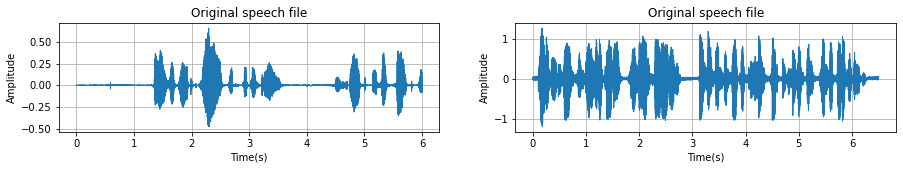

In [10]:
d, sr = librosa.load("auds/set2.wav",8000)
d1, sr = librosa.load("auds/speech.wav",8000)
plt.figure(figsize=(15,2))
for i,di in enumerate([d,d1]):
    plt.subplot(1,2,i+1)
    t=np.linspace(0,len(di)/sr,len(di))
    plt.plot(t,di, lw=1)
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.title('Original speech file')
    plt.grid(True)
plt.show()

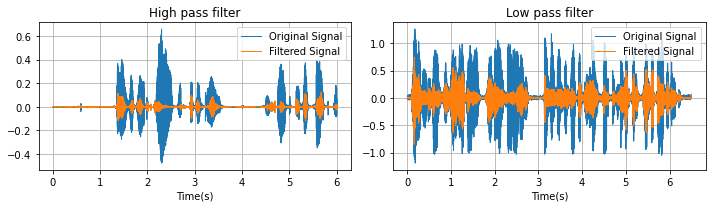

In [12]:
b, a = signal.butter(4, 2000. / (sr / 2.), 'high')
d_high = signal.filtfilt(b, a, d)

b, a = signal.butter(4, 500. / (sr / 2.), 'low')
d_low = signal.filtfilt(b, a, d1)

fig, ax = plt.subplots(1, 2, figsize=(10, 3),tight_layout=True)
ax = ax.flat

for i, (original,filtered) in enumerate([(d,d_high),(d1,d_low)]):
    t = np.linspace(0., len(original) / sr, len(original))
    ax[i].plot(t, original, lw=1,label="Original Signal")
    ax[i].plot(t, filtered, lw=1,label="Filtered Signal")
    ax[i].set_xlabel('Time(s)')
    ax[i].grid(True)
    ax[i].legend(loc=1)

ax[0].set_title('High pass filter')
ax[1].set_title('Low pass filter')

plt.show()